<a href="https://colab.research.google.com/github/yewonbahn/mystudy/blob/master/0130_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이번 프로젝트? 옷들을 자동으로 분류하여, 제3의 데이터가 들어왔을떄 몇퍼센트의 확률로 어떤 옷인지? 어떤 data인지 ?
### 예측하는 모델!



In [8]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [12]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [13]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle Boot']

In [17]:
train_images.shape

(60000, 28, 28)

In [16]:
len(train_labels)

60000

In [18]:
test_images.shape

(10000, 28, 28)

##데이터 전처리
!중요! 네트워크가 데이터를 잘사용할수있도록 잘 가공해야한다!

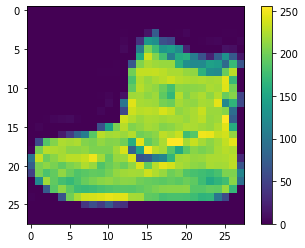

In [22]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
train_images=train_images/255.0

test_images=test_images/255.0

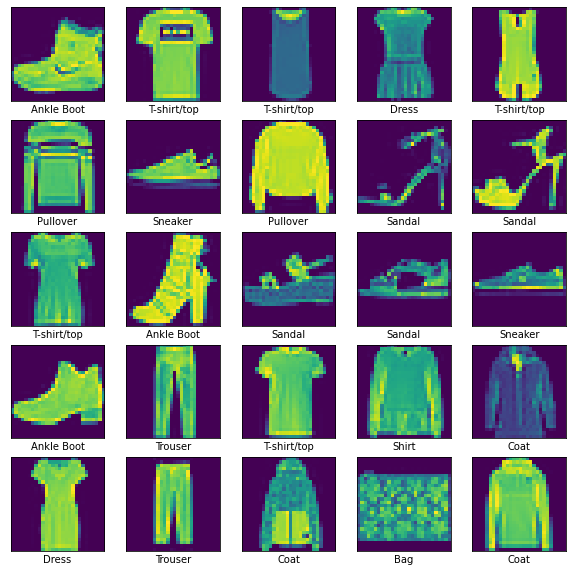

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
model=keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128,activation='relu'),
keras.layers.Dense(10,activation='softmax')
])


In [28]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6302 - accuracy: 0.7800
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3839 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3413 - accuracy: 0.8762
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3176 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.8925


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 정확도 평가 : 
모델 성능 비교 

In [32]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print("\n테스트 정확도",test_acc)

313/313 - 0s - loss: 0.3456 - accuracy: 0.8733

테스트 정확도 0.8733000159263611


In [34]:
predictions=model.predict(test_images)

In [36]:
predictions[0]

array([3.3240755e-07, 2.7566818e-10, 1.6464213e-08, 1.8991977e-09,
       1.0936912e-07, 2.9461220e-02, 8.5284654e-07, 3.3558797e-02,
       2.4381100e-06, 9.3697619e-01], dtype=float32)

In [38]:
np.argmax(predictions[0])

9

In [39]:
test_labels[0]

9

데이터 시각화

In [56]:
# i번째 / 예측 데이터 / 실제 답 / 이미지 배열을 받아
# 정답이면 파란색, 오답이면 빨간색 그래프 출력하는 함수
def plot_image(i, predictions_array, true_label, img):
  # 받아온 i번째 예측 데이터, i번째 true_label(정답), i번째 이미지 
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  # 흑백으로(cmap=plt.cm.binary) 이미지 보여주기
  plt.imshow(img, cmap=plt.cm.binary)

  # predictions_array 중 최대값을 predicted_label에 담기
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:   # 만약 정답이라면
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")   # 회색
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

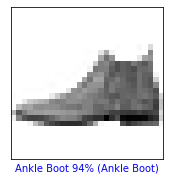

In [57]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)

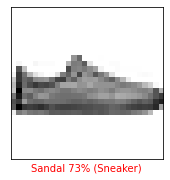

In [58]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)

In [59]:

img=test_images[0]
print(img.shape)

(28, 28)


In [60]:
img=(np.expand_dims(img,0))
print(img.shape)

predictions_single=model.predict(img)

(1, 28, 28)


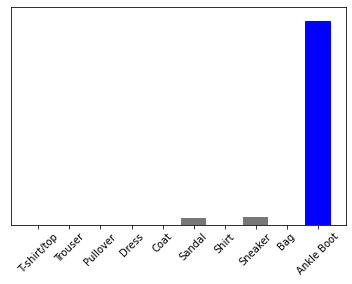

In [61]:
plot_value_array(0,predictions_single,test_labels)
_=plt.xticks(range(10),class_names,rotation=45)